# Random numbers
## Histogram of uniform distribution

Look at histogram using Poisson error calculation.

 
Histogram bins start at 0.0 finish at 1.0
Number of bins is 10 and width of bins is 0.1
Chi2 per bin [1.35 1.07 0.06 0.54 0.42 1.46 0.58 0.3  0.02 0.09]
Chi2 5.88
chi2 per DoF 0.59
Proportion of bins with deviation greater than error 0.30
 


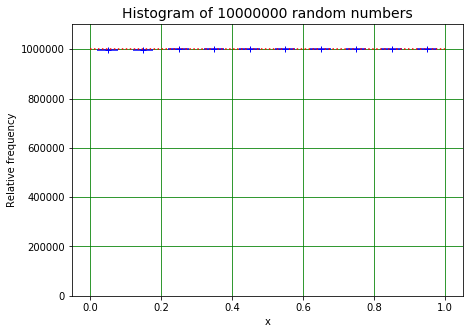

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
binBot = 0.0
binTop = 1.0
binNumber = 10
binEdges = np.linspace(binBot, binTop, binNumber + 1)
binWidth = (binTop - binBot)/binNumber
print(" ")
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
#
nEntries = int(10000000)
rand = np.random.rand(nEntries)
hist, binEdges = np.histogram(rand, bins = binEdges)
binCentres = (binEdges[0:binNumber] + binEdges[1:binNumber + 1])/2
expInBin = nEntries*binWidth
chi2PerBin = (hist - expInBin)**2/hist
chi2 = np.sum(chi2PerBin)
propOut = np.sum(chi2PerBin > 1)/binNumber
redChi2 = chi2/binNumber
np.set_printoptions(precision = 2)
print("Chi2 per bin",chi2PerBin)
print(f"Chi2 {chi2:.2f}")
print(f"chi2 per DoF {redChi2:.2f}")
print(f"Proportion of bins with deviation greater than error {propOut:.2f}")
#
print(" ")
plt.figure(figsize = (7, 5))
plt.title("Histogram of " + str(nEntries) + " random numbers", fontsize = 14)
plt.xlabel('x')
plt.ylabel('Relative frequency')
plt.errorbar(binCentres, hist, xerr = np.ones(binNumber)*binWidth/np.sqrt(12), yerr = np.sqrt(hist), 
             marker = '+', linestyle = '', color = 'b')
plt.plot([0.0, 1.0], [expInBin, expInBin], marker = '', linestyle = ':', color = 'r')
plt.ylim(0.0, 1.1*(np.amax(hist + np.sqrt(hist))))
plt.grid(color = 'g')
plt.show()

Histogram with multinomial error calculation.

 
Histogram bins start at 0.0 finish at 1.0
Number of bins is 10 and width of bins is 0.1
Chi2 per bin [0.39  inf  inf 1.05 0.39 0.   0.39 0.   1.05 2.4 ]
Chi2 per bin (Poisson) [0.33  inf  inf 1.   0.33 0.   0.33 0.   1.   1.8 ]
Chi2 inf, chi2 (Poisson) inf
Chi2 per DoF inf, chi2 per DoF (Poisson) inf
Proportion of bins with deviation greater than error 0.50, proportion (Poisson) 0.30.
 


C:\Users\green\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\green\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


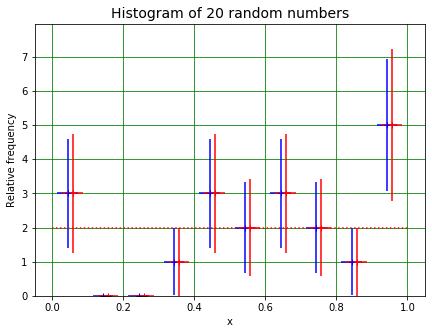

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
binBot = 0.0
binTop = 1.0
binNumber = 10
binEdges = np.linspace(binBot, binTop, binNumber + 1)
binWidth = (binTop - binBot)/binNumber
print(" ")
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
#
nEntries = int(20)
rand = np.random.rand(nEntries)
hist, binEdges = np.histogram(rand, bins = binEdges)
binCentres = (binEdges[0:binNumber] + binEdges[1:binNumber + 1])/2
expInBin = nEntries*binWidth
complement = np.zeros(binNumber)
error = np.zeros(binNumber)
var = hist*(1 - hist/nEntries)
chi2PerBin = (hist - expInBin)**2/var
chi2 = np.sum(chi2PerBin)
propOut = np.sum(chi2PerBin > 1)/binNumber
redChi2 = chi2/binNumber
chi2PerBinP = (hist - expInBin)**2/hist
chi2P = np.sum(chi2PerBinP)
propOutP = np.sum(chi2PerBinP > 1)/binNumber
redChi2P = chi2P/binNumber
np.set_printoptions(precision = 2)
print("Chi2 per bin",chi2PerBin)
print("Chi2 per bin (Poisson)",chi2PerBinP)
print(f"Chi2 {chi2:.2f}, chi2 (Poisson) {chi2P:.2f}")
print(f"Chi2 per DoF {redChi2:.2f}, chi2 per DoF (Poisson) {redChi2P:.2f}")
print(f"Proportion of bins with deviation greater than error {propOut:.2f}, proportion (Poisson) {propOutP:.2f}.")
#
print(" ")
plt.figure(figsize = (7, 5))
plt.title("Histogram of " + str(nEntries) + " random numbers", fontsize = 14)
plt.xlabel('x')
plt.ylabel('Relative frequency')
plt.errorbar(binCentres - 0.007, hist, xerr = np.ones(binNumber)*binWidth/np.sqrt(12), yerr = np.sqrt(var), 
             marker = '+', linestyle = '', color = 'b')
plt.errorbar(binCentres + 0.007, hist, xerr = np.ones(binNumber)*binWidth/np.sqrt(12), yerr = np.sqrt(hist), 
             marker = '+', linestyle = '', color = 'r')
plt.plot([0.0, 1.0], [expInBin, expInBin], marker = '', linestyle = ':', color = 'r')
plt.ylim(0.0, 1.1*(np.amax(hist + np.sqrt(hist))))
plt.grid(color = 'g')
plt.show()

In [32]:
nEntries = int(100)
rand = np.random.rand(nEntries)
hist, binEdges = np.histogram(rand, bins = binEdges)
binCentres = (binEdges[0:binNumber] + binEdges[1:binNumber + 1])/2
expInBin = nEntries*binWidth
chi2PerBin = (hist - expInBin)**2/hist
chi2 = np.sum(chi2PerBin)
propOut = np.sum(chi2PerBin > 1)/binNumber
print("chi2PerBin > 1",chi2PerBin > 1)
print("np.sum(chi2PerBin > 1)",np.sum(chi2PerBin > 1))

chi2PerBin > 1 [False False  True  True  True False  True False False  True]
np.sum(chi2PerBin > 1) 5


In [4]:
def factorial(N):
    '''
    Given an integer, return the factorial
    '''
    prod = 1
    print("N =",N)
    for n in range(1, N):
        prod *= n + 1
    return prod
#
N = 10
print(f"factorial({N:d}) = {factorial(N)}")

N = 10
factorial(10) = 3628800


In [5]:
N = 10
#
# Sum integers from one to N
Sum = int(np.cumsum(np.linspace(1, N, N))[N - 1])
print(f"Sum of integers from 1..{N:d} is {Sum:d}")

Sum of integers from 1..10 is 55
